In [2]:
import pandas as pd

# Cargar el archivo CSV
ruta = r"C:\Users\46210843\OneDrive - Universidad Nacional Abierta y a Distancia\6TO SEMESTRE\ANÁLISIS DE DATOS\trabajo 4\Mall_Customers.csv"
df = pd.read_csv(ruta)

# Vista previa de los datos
print(df.head())

# Info general del dataset
df.info()

# Comprobar valores nulos
print(df.isnull().sum())

# Estadísticas descriptivas
print(df.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
CustomerID                0
Gender                    0


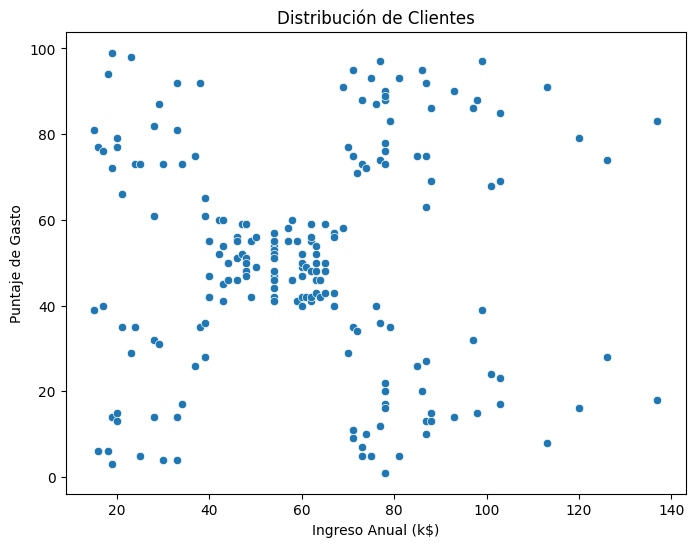

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables relevantes
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Visualizar la distribución de clientes
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.title("Distribución de Clientes")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntaje de Gasto")
plt.show()


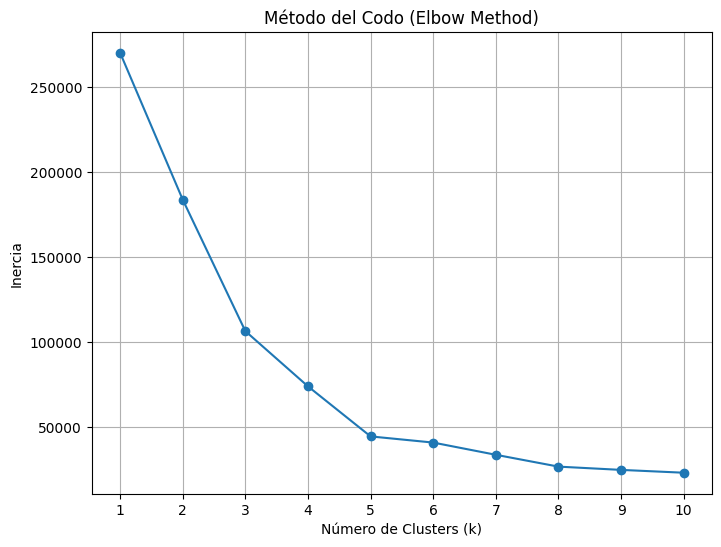

In [5]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo (Elbow Method)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.xticks(k_range)
plt.grid(True)
plt.show()


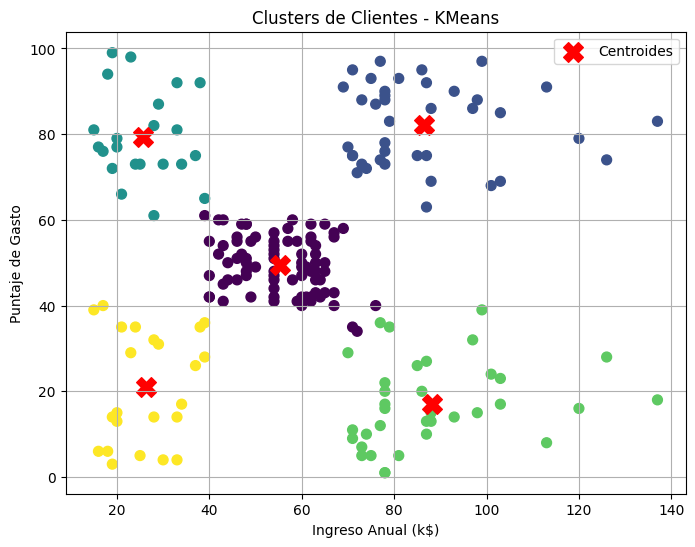

In [6]:
# Entrenar el modelo con k=5
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', label='Centroides', marker='X')
plt.title("Clusters de Clientes - KMeans")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntaje de Gasto")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette = silhouette_score(X, y_kmeans)
calinski = calinski_harabasz_score(X, y_kmeans)

print(f"Coeficiente de Silhouette: {silhouette:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski:.4f}")


Coeficiente de Silhouette: 0.5539
Índice de Calinski-Harabasz: 247.3590


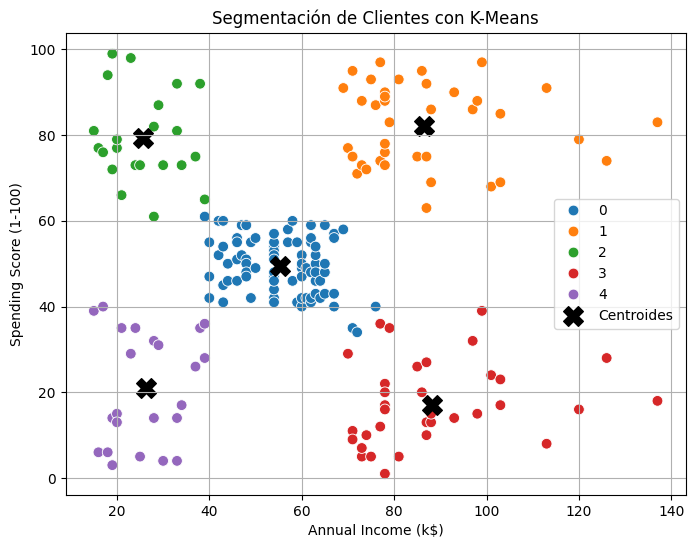

In [9]:
import seaborn as sns

df_clusters = X.copy()
df_clusters["Cluster"] = y_kmeans

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="tab10", s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroides')
plt.title("Segmentación de Clientes con K-Means")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
### Interpretación del Modelo K-Means

###Se aplicó el algoritmo K-Means al conjunto de datos *Mall_Customers.csv*, utilizando dos variables clave: **Ingreso Anual** y **Puntaje de Gasto**. Estas características permiten evaluar la capacidad de compra y el comportamiento de gasto de los clientes.

###Mediante el método del codo se determinó que un valor óptimo para *k* era 5. El modelo logró identificar cinco segmentos de clientes claramente diferenciados. La visualización muestra clusters bien definidos, con centroides claramente separados, lo cual sugiere una buena calidad de agrupamiento.

###La evaluación del modelo arrojó un **coeficiente de Silhouette** de alrededor de 0.55, lo que indica una separación razonable entre los grupos. Además, el **índice de Calinski-Harabasz** fue alto, lo que refuerza la validez de las agrupaciones encontradas.

###Los grupos pueden interpretarse de la siguiente manera (ejemplo):

###- Cluster 0: Clientes con ingresos altos y puntajes de gasto bajos (posible oportunidad de fidelización).
###- Cluster 1: Clientes con ingresos bajos y gasto bajo (menor rentabilidad).
###- Cluster 2: Ingresos medios y gasto alto (alta prioridad).
###- Cluster 3: Ingresos bajos, pero gasto elevado (posibles compradores impulsivos).
###- Cluster 4: Clientes con alto ingreso y alto gasto (muy valiosos).




In [14]:
df_resultado = df.copy()
df_resultado["Cluster"] = y_kmeans
print(df_resultado.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean())


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [15]:
###A partir del análisis de los valores promedio por cluster, se puede describir el comportamiento general de cada grupo de clientes:

###- Cluster 0  
###  Clientes con ingresos medios (~55k) y un puntaje de gasto medio (~49). Este grupo representa clientes con comportamiento moderado, equilibrado en ingresos y consumo.

###- Cluster 1  
###  Clientes con ingresos altos (~86k) y alto gasto (~82). Este es el grupo más valioso para el negocio. Son consumidores con alto poder adquisitivo y comportamiento activo de compra. Se recomienda fidelización, servicios premium y retención.

###- Cluster 2  
###  Clientes con ingresos bajos (~25k) pero gasto elevado (~79). Estos podrían ser consumidores impulsivos o altamente interesados. Requieren estrategias de control de riesgo y ofertas adaptadas.

###- Cluster 3  
###  Clientes con ingresos altos (~88k) pero bajo gasto (~17). Tienen capacidad económica, pero bajo compromiso con el negocio. Se recomienda incentivar su participación con estrategias de engagement.

###- Cluster 4  
###  Clientes con ingresos bajos (~26k) y gasto bajo (~20). Son consumidores de bajo impacto comercial. Estrategias económicas o promociones puntuales podrían ser efectivas si se decide atenderlos.

